<a href="https://colab.research.google.com/github/Binarybeast-code/House-Price-Predictions/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Here we are loading ou house price dataset and also importing some important modules that are going to be use in this project**

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**Load the data from a CSV file**

In a data_description.txt you'll find a  brief version of the dataset.

In [27]:
train_data = pd.read_csv("/content/drive/MyDrive/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/test.csv")

test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [28]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


$$ Here\ am\ getting\ the\ shape\ of\ my\ dataset\ since\ I'll\ need\ the\ number\ of\ rows$$

In [29]:
train_data.shape[0]

1460

$$Ratio\ Of\ Missing\
 Values \ =  \frac{Number\   of\ missing\ values\ in\ a\ column}{Total\ number\ of\ rows}$$

In [30]:
RM = pd.Series()
number_of_rows = len(train_data)

for col in train_data.columns:
    num_missing = train_data[col].isnull().sum()
    ratio_missing = num_missing / number_of_rows
    RM[col] = ratio_missing


<ipython-input-30-7931c7e3a47c>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  RM = pd.Series()


### **Checking the distribution of my missing value so that I can make informed decision on which columns to drop then the remaining I repalace them with a mean**

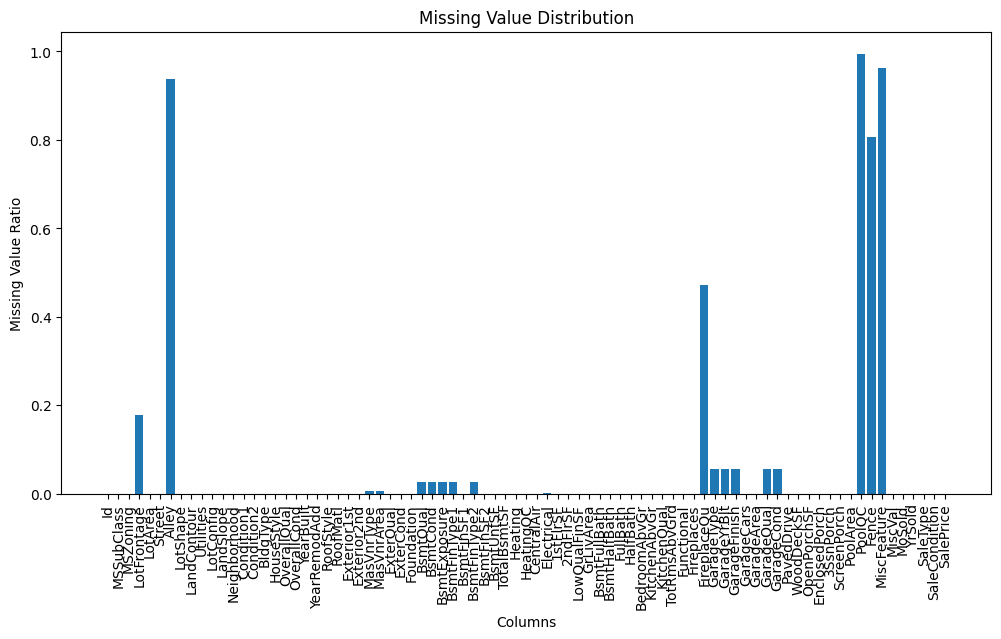

In [31]:
plt.figure(figsize=(12, 6))
plt.bar(RM.index.astype(str), RM)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Missing Value Ratio')
plt.title('Missing Value Distribution')
plt.show()


### **Setting the threshold value to be 60 percent so that we can drop all columns that have above 60 percent missing values**

In [32]:
RM_df = pd.DataFrame({'Column': train_data.columns, 'Ratio' : RM})


columns_to_drop = RM_df[RM_df['Ratio'] > 0.6]['Column']

train_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)

In [33]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [34]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


### **Replacing the remaining missing value with the mean of each column**

In [35]:

column_mean = train_data.mean()
train_data.fillna(column_mean, inplace=True)
test_data.fillna(column_mean, inplace=True)

print("missing values: ",train_data.isnull().sum())

missing values:  Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64


<ipython-input-35-e0782c544688>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_mean = train_data.mean()


**Split the data into input features (X) and target variable(y)**

In [36]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [47]:
X_train = train_data.drop("SalePrice", axis=1)
y_train = train_data["SalePrice"]
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

**Split the test data into input features(X_test)**

In [38]:
X_test = test_data

**Creating an object/instance of linearRegression model**

In [39]:
model = LinearRegression()

**Converting each category into a numerical label**

In [40]:
label_encoder = LabelEncoder()


for column in X_train.columns:

  if X_train[column].dtype == 'object':

    X_train[column] = label_encoder.fit_transform(X_train[column])

In [41]:
label_encoder = LabelEncoder()


for column in X_test.columns:

  if X_test[column].dtype == 'object':

    X_test[column] = label_encoder.fit_transform(X_test[column])

**Fitting the model to the training data**

In [42]:
model.fit(X_train,y_train)

LinearRegression()

In [43]:
y_pred = model.predict(test_data)
#y_pred_binary = np.round(y_pred)
print(y_pred)

[102964.27848462 151760.34105141 164666.02908151 ... 144330.12808912
 116455.42969586 238847.97186941]


In [46]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,3,3,0,4,...,0,0,0,120,0,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,0,3,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,0,3,0,4,...,34,0,0,0,0,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,0,3,0,4,...,36,0,0,0,0,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,0,1,0,4,...,82,0,0,144,0,0,1,2010,8,4


In [48]:
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)


# Print performance metrics
print("Accuracy:", mean_squared)
print("Precision:", mean_absolute)
print("Recall:", r2)


ValueError: ignored